# Churn Reduction


#### Project Description :
    
Churn (loss of customers to competition) is a problem for companies because it is more expensive to acquire a new customer than to keep your existing one from leaving. This problem statement is targeted at enabling churn reduction using analytics concepts. We have to Churn Rate on the basis of their usage data.


#### Loading Libraries & Data

In [4]:
# Importing Libraries

import os        
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [5]:
#Setting working directory

train = pd.read_csv('telecom_churn.csv')


#### Exploring Data

In [3]:
train.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#Checking info of data as data types and rows n cols
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [5]:
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
#All continous variables in cname
cname = train.columns[(train.dtypes=="float64")|(train.dtypes=="int64")].tolist()
print(cname)

#All categorical var in cat_names and removing target var
cat_names = train.select_dtypes(exclude=np.number).columns.tolist()
cat_names.remove('Churn')
cat_names

['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


['State', 'International plan', 'Voice mail plan']

In [7]:
train['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

#### Checking Missing Value in Data

In [8]:
#Checking missing values in train dataset
print(train.isnull().sum())  

#no missing value present in the train data

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


#### Visualizing data

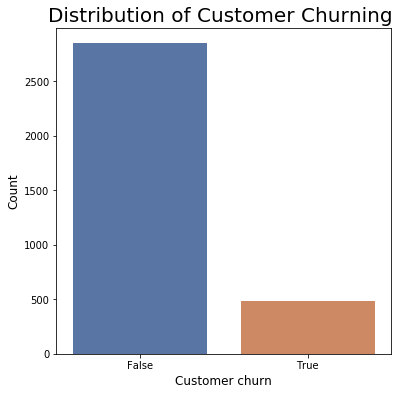

In [10]:
#Target Variable data distribution
plt.figure(figsize=(6,6))
sns.countplot(x = train.Churn,palette='deep')
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churning ",fontsize= 20)
plt.show()

###### It is clear that we have a Class Imbalance problem

In [11]:
#Groupby --> size to represent ---> unstack the category
#train.groupby(["state", "Churn"]).size().unstack(level=-1).head()

#Relationational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):
    
    train.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

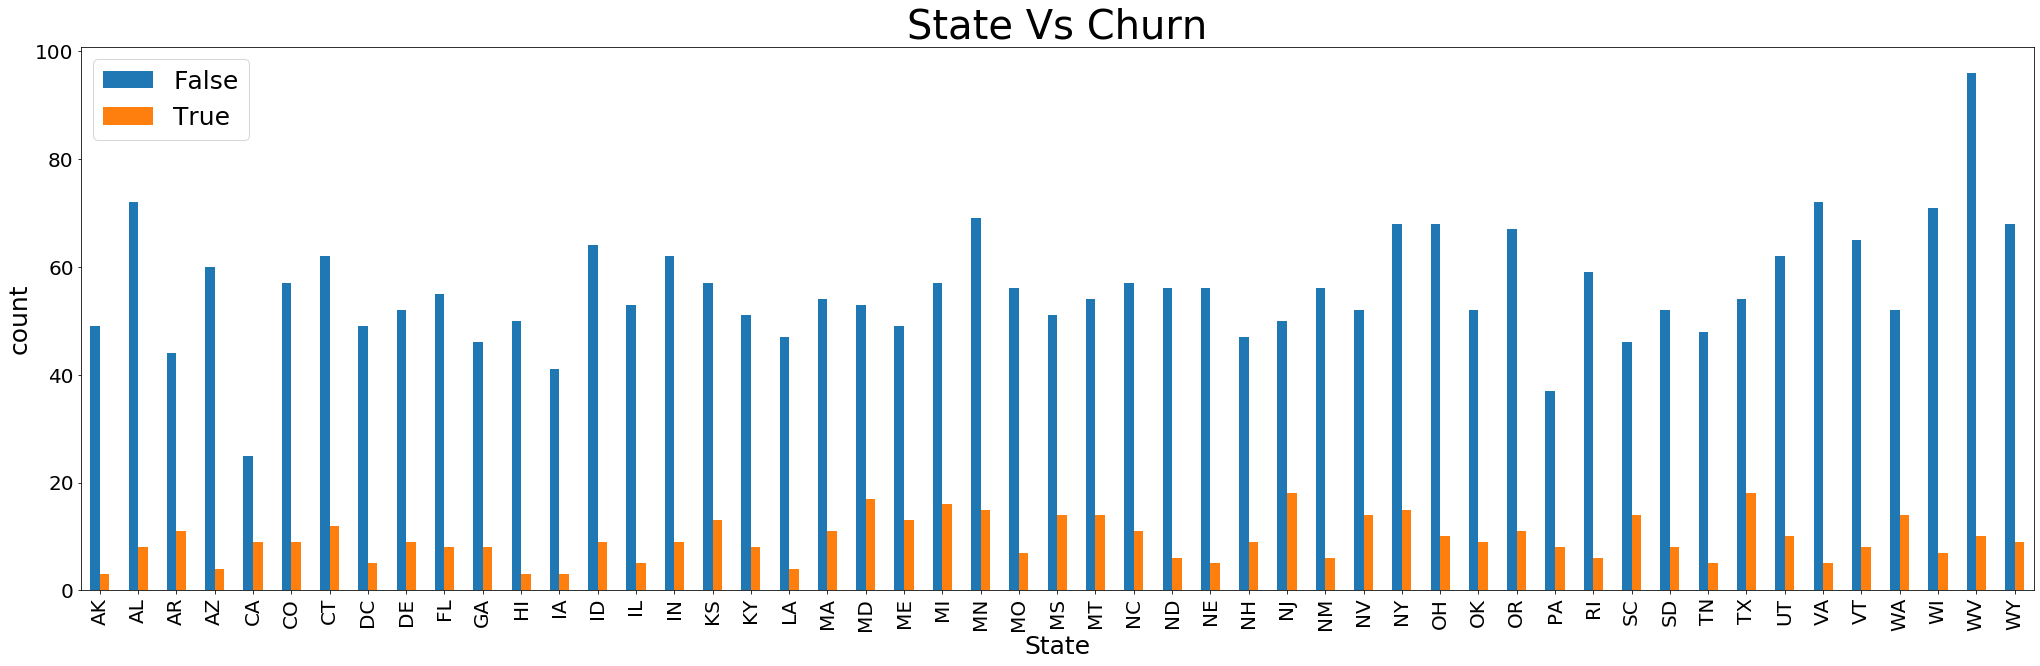

In [12]:
#State Wise Churning of customer
diff_bar('State','Churn')

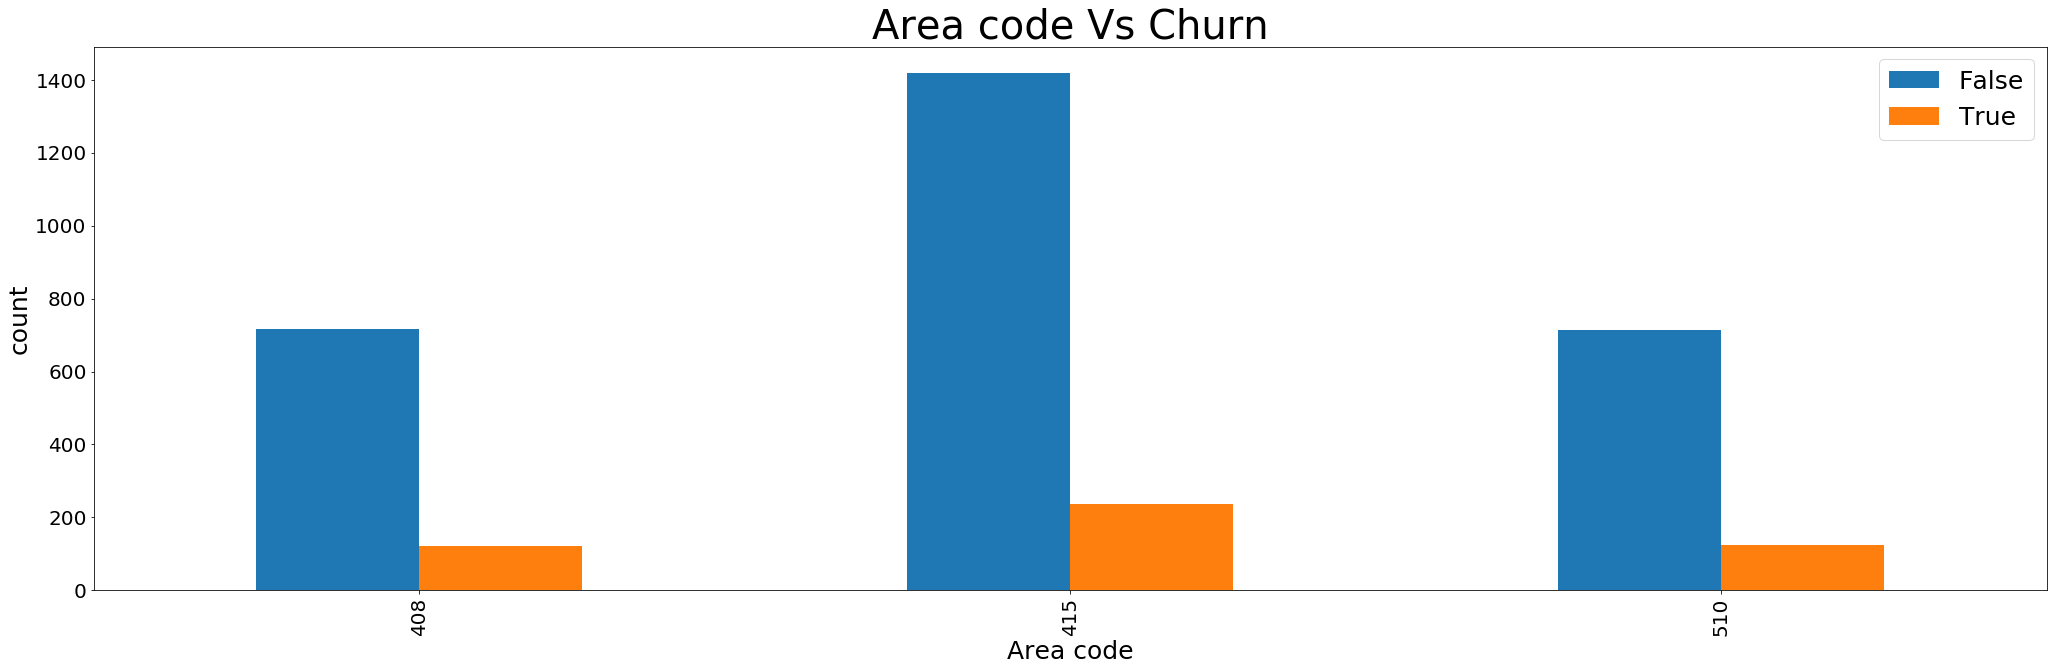

In [13]:
#area_code Wise Churning of customer
diff_bar('Area code','Churn')

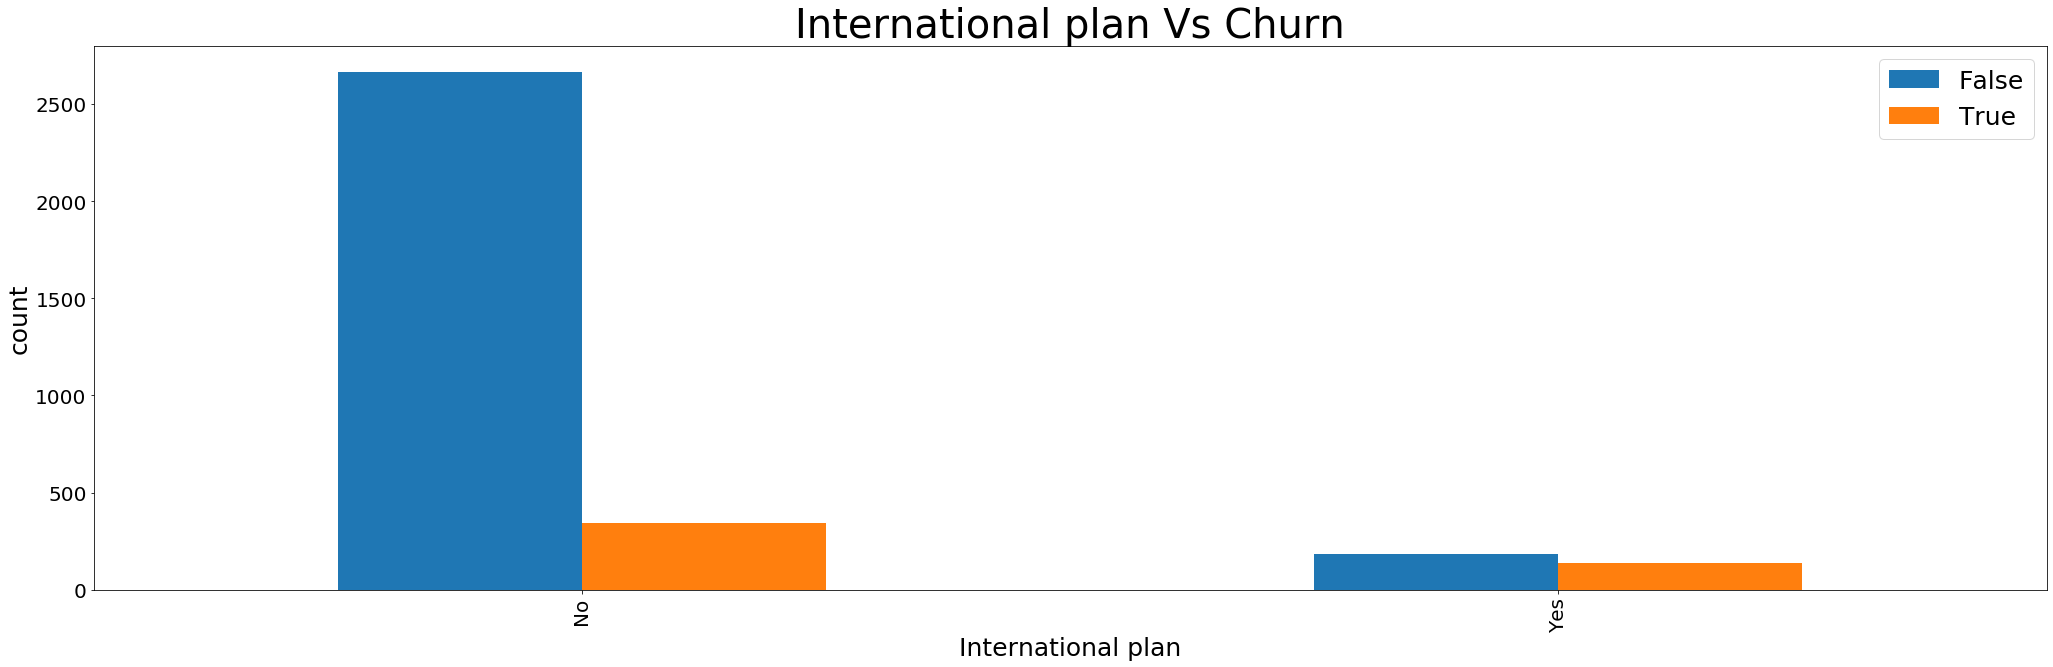

In [14]:
#International_Plan Wise Churning of customer
diff_bar('International plan','Churn')

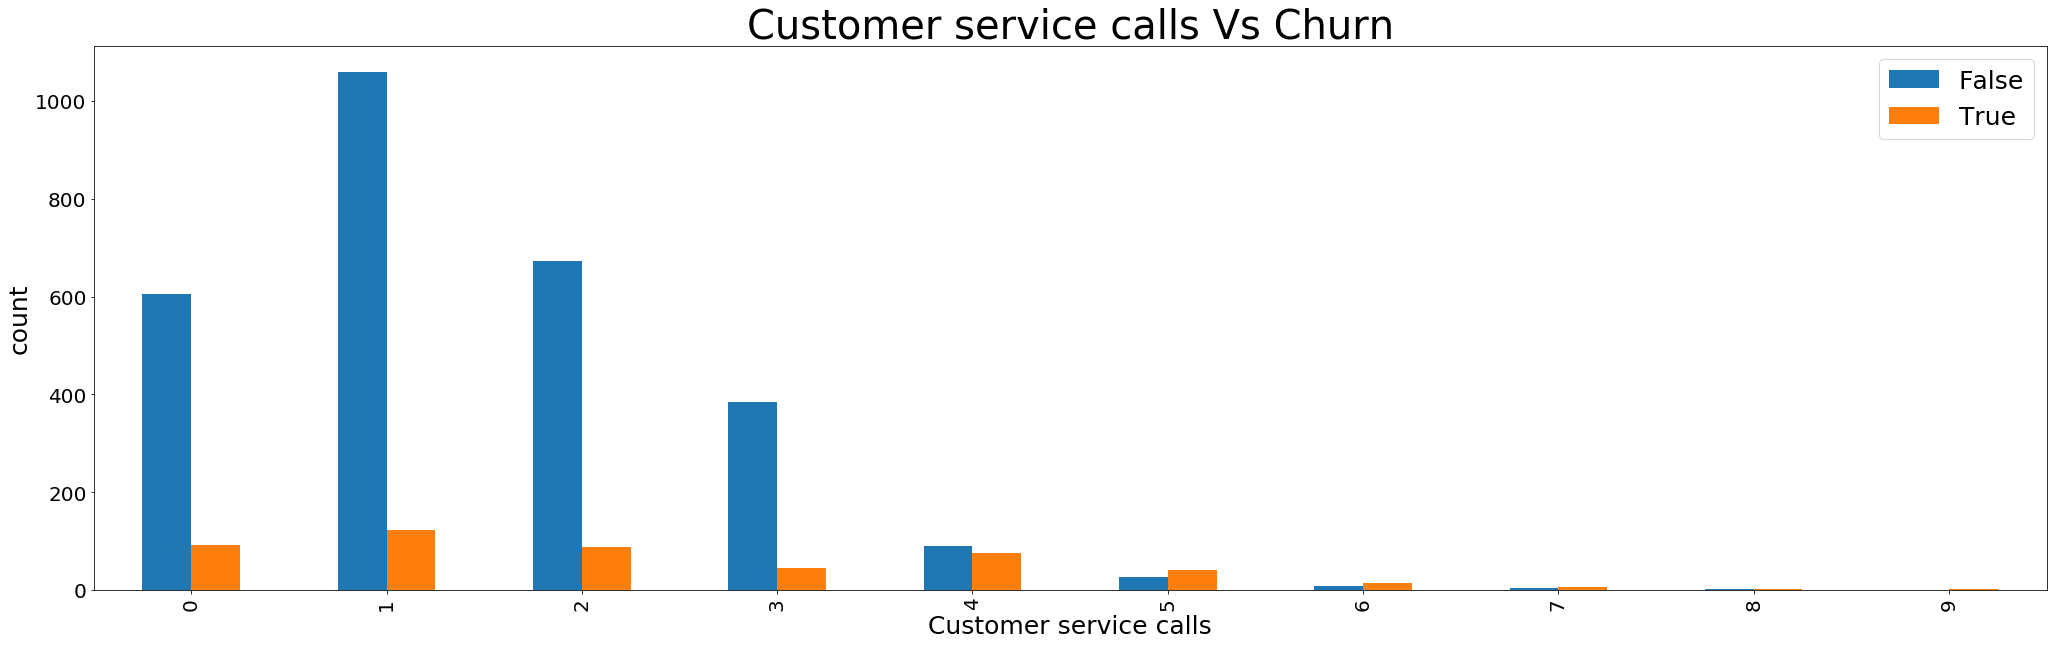

In [15]:
#Number of Customer_Service Call Wise Churning of customer
diff_bar('Customer service calls','Churn')

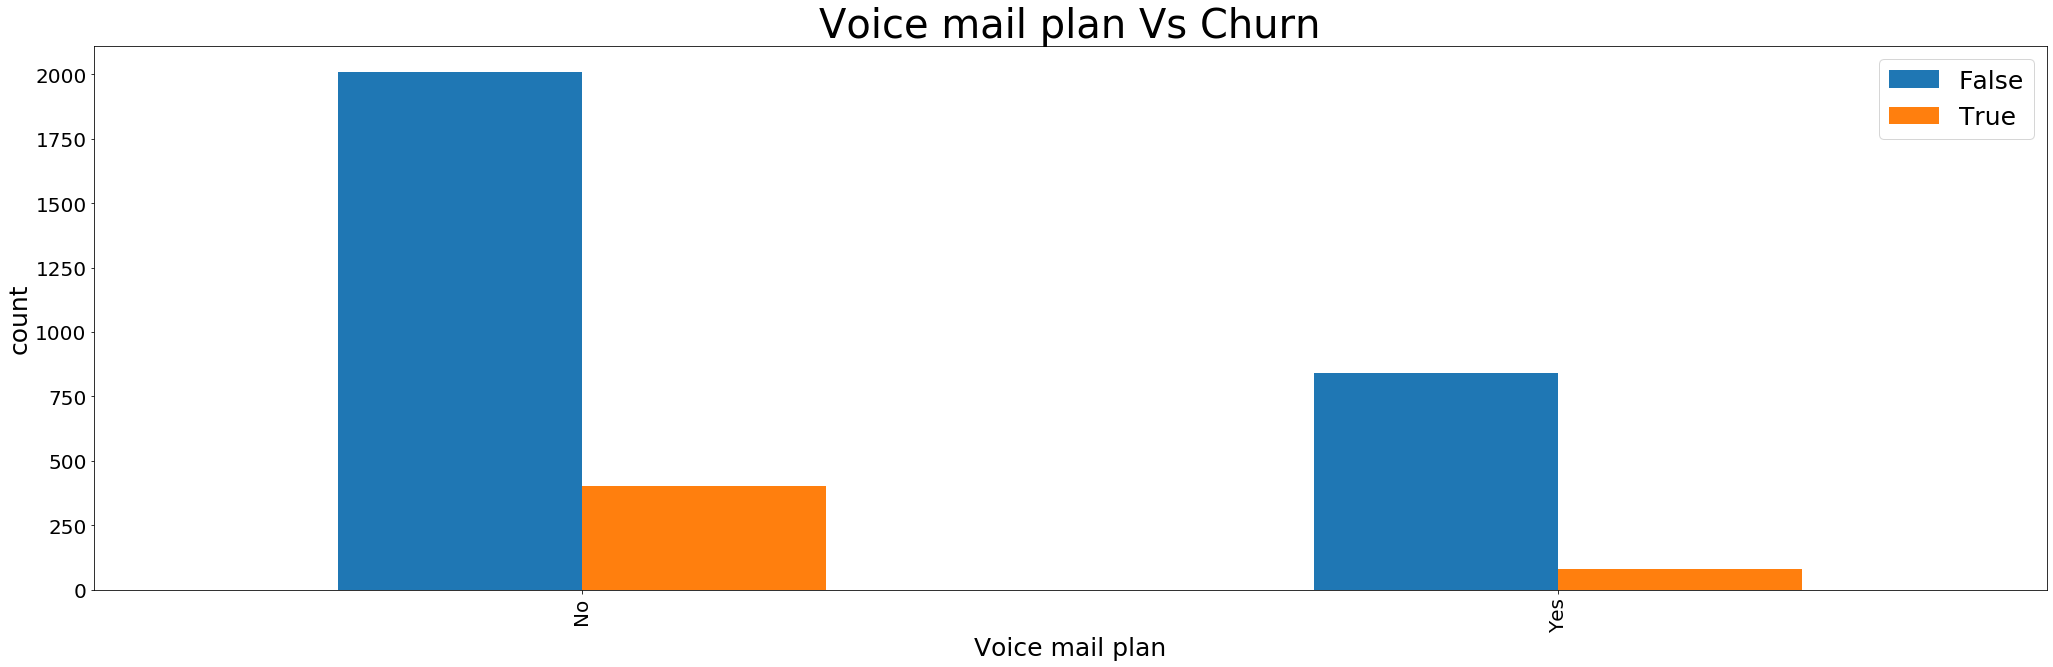

In [16]:
#No. of Customer Churning and had a Voice mail plan
diff_bar('Voice mail plan','Churn')

In [17]:
#Scatter plot function
def diff_scattr(x,y):
    fig = plt.figure()
    fig = sns.lmplot(x,y, data=train,fit_reg=False)
    plt.xlabel(x,fontsize= 14)
    plt.ylabel(y,fontsize= 14)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title("{X} and {Y} Scatter Plot".format(X=x,Y=y),fontsize = 16)
    #fig.savefig("{X}_and_{Y}_Scatter_Plot..png".format(X=x,Y=y))
    plt.show()

<Figure size 432x288 with 0 Axes>

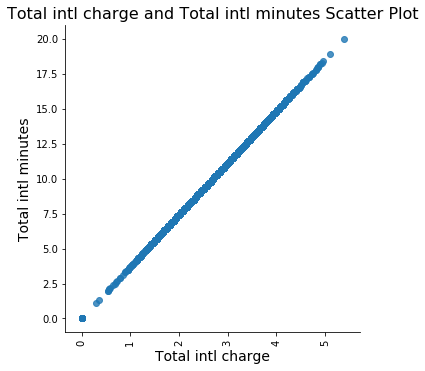

In [18]:
#Total intl charge and Total intl Minute
diff_scattr('Total intl charge','Total intl minutes')

<Figure size 432x288 with 0 Axes>

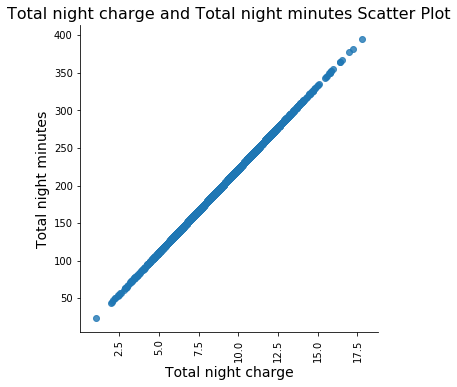

In [19]:
## Total night charge and Total night Minute
diff_scattr('Total night charge','Total night minutes')

<Figure size 432x288 with 0 Axes>

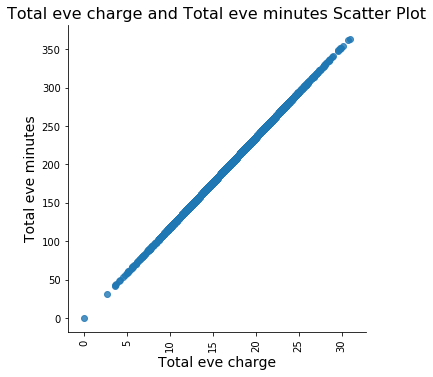

In [20]:
#Total eve charge and Total eve Minute
diff_scattr('Total eve charge','Total eve minutes')

<Figure size 432x288 with 0 Axes>

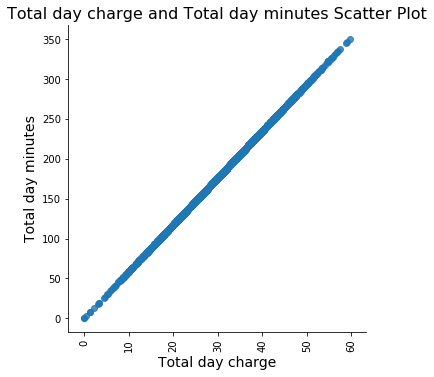

In [21]:
#Total day charge and Total Day Minute
diff_scattr('Total day charge','Total day minutes')

#### Changing Categorical colum values to numeric codes

In [34]:
#function for converting categoric to num codes
def cat_to_num(df):
    for i in range(0, df.shape[1]):
        #print(i)
        if(df.iloc[:,i].dtypes == 'object'):
            df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
            df.iloc[:,i] = df.iloc[:,i].cat.codes
            df.iloc[:,i] = df.iloc[:,i].astype('object')
    return df

In [35]:
train = cat_to_num(train)


#### Anomaly Detections or Outlier Analysis

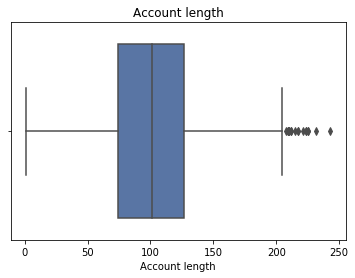

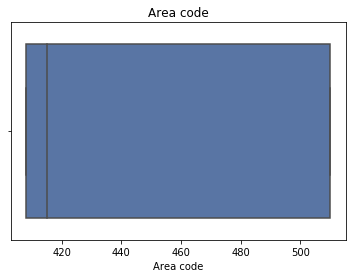

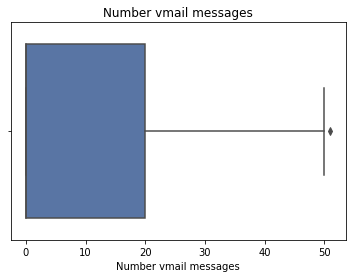

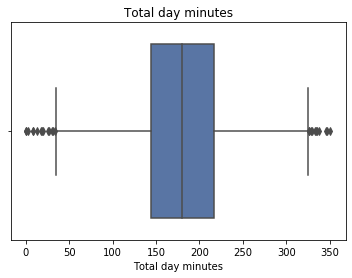

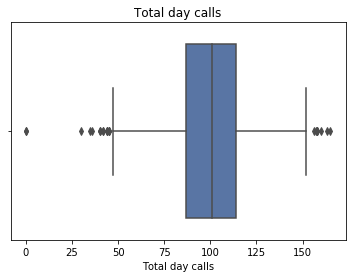

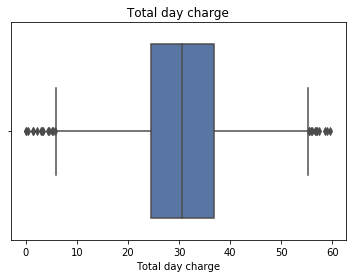

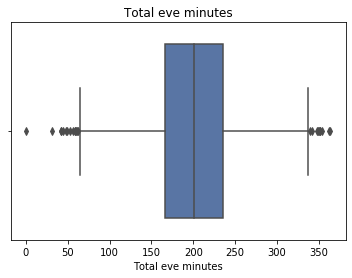

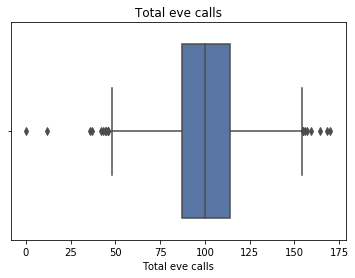

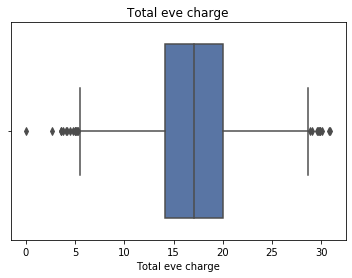

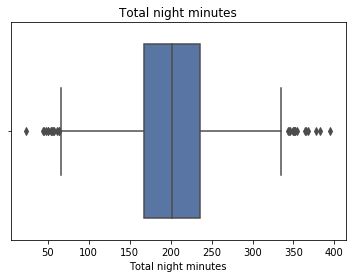

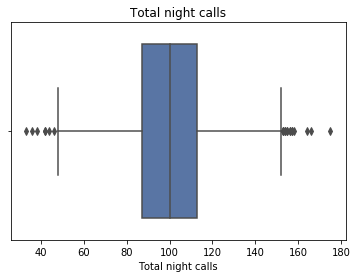

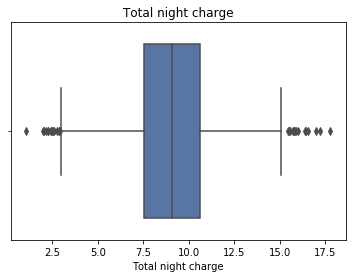

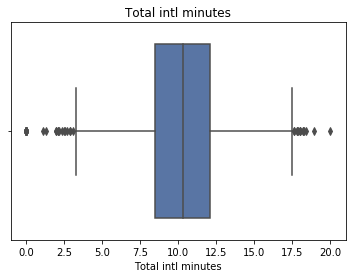

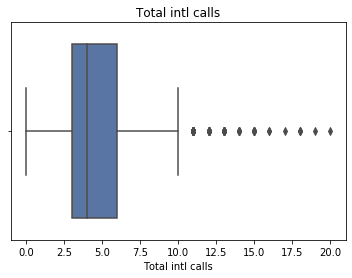

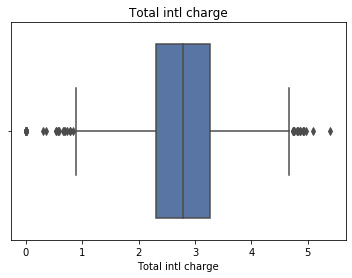

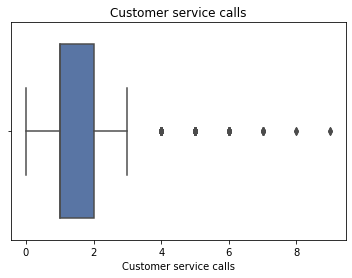

In [24]:
# #Plotting Box Plot
for i in cname:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(train[i],palette="deep")
    plt.title(i)
    plt.show()

In [25]:
#Treating Out Liers and Converting them to nan
for i in cname:
    #print(i)
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
#Converting to nan
    train.loc[train.loc[:,i] < minn,i] = np.nan
    train.loc[train.loc[:,i] > maxx,i] = np.nan
    print('{var} -----> {X}   Missing'.format(var = i, X = (train.loc[:,i].isnull().sum())))

Account length -----> 18   Missing
Area code -----> 0   Missing
Number vmail messages -----> 1   Missing
Total day minutes -----> 25   Missing
Total day calls -----> 23   Missing
Total day charge -----> 25   Missing
Total eve minutes -----> 24   Missing
Total eve calls -----> 20   Missing
Total eve charge -----> 24   Missing
Total night minutes -----> 30   Missing
Total night calls -----> 22   Missing
Total night charge -----> 30   Missing
Total intl minutes -----> 46   Missing
Total intl calls -----> 78   Missing
Total intl charge -----> 49   Missing
Customer service calls -----> 267   Missing


In [26]:
# Imputing with mean because fancyimpute not working
for i in cname:
    print (i)
    train = train.apply(lambda x:x.fillna(train.loc[:,i].mean()))   
    

Account length
Area code
Number vmail messages
Total day minutes
Total day calls
Total day charge
Total eve minutes
Total eve calls
Total eve charge
Total night minutes
Total night calls
Total night charge
Total intl minutes
Total intl calls
Total intl charge
Customer service calls


In [27]:
train.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128.0,415.0,0,1,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.7,1.0,False


### Feature Selections

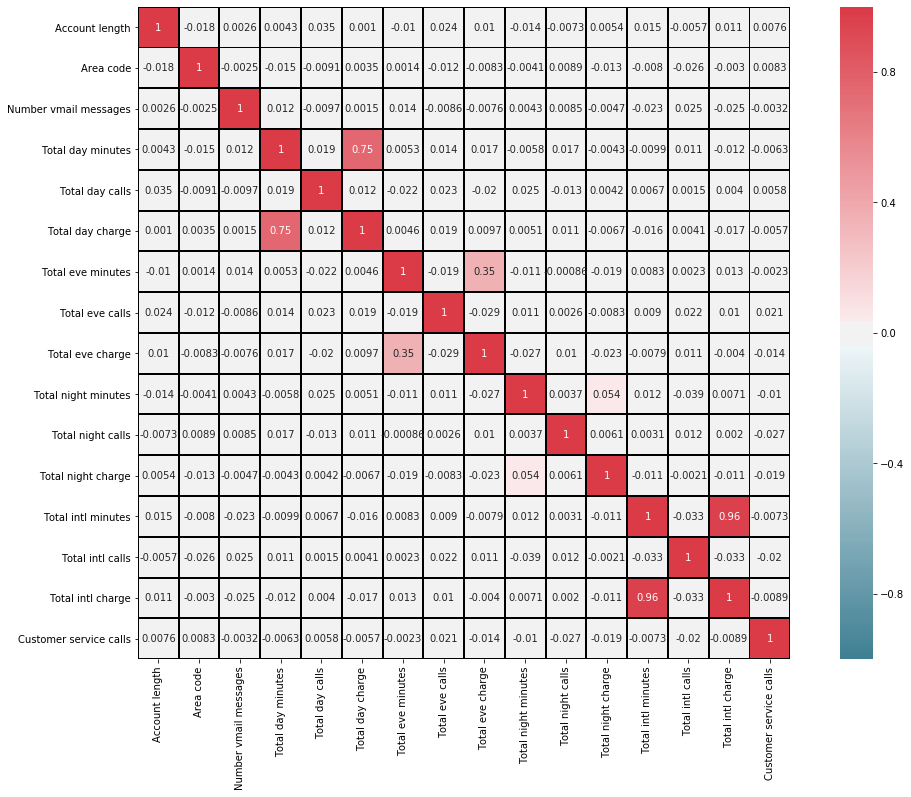

In [28]:
#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(18,12))  #Width,height

#Generating Corelation Matrix
corr = train[cname].corr()

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()
#f.savefig('heatmap.png')

###  Feature Scaling

##### Checking Distribution of data

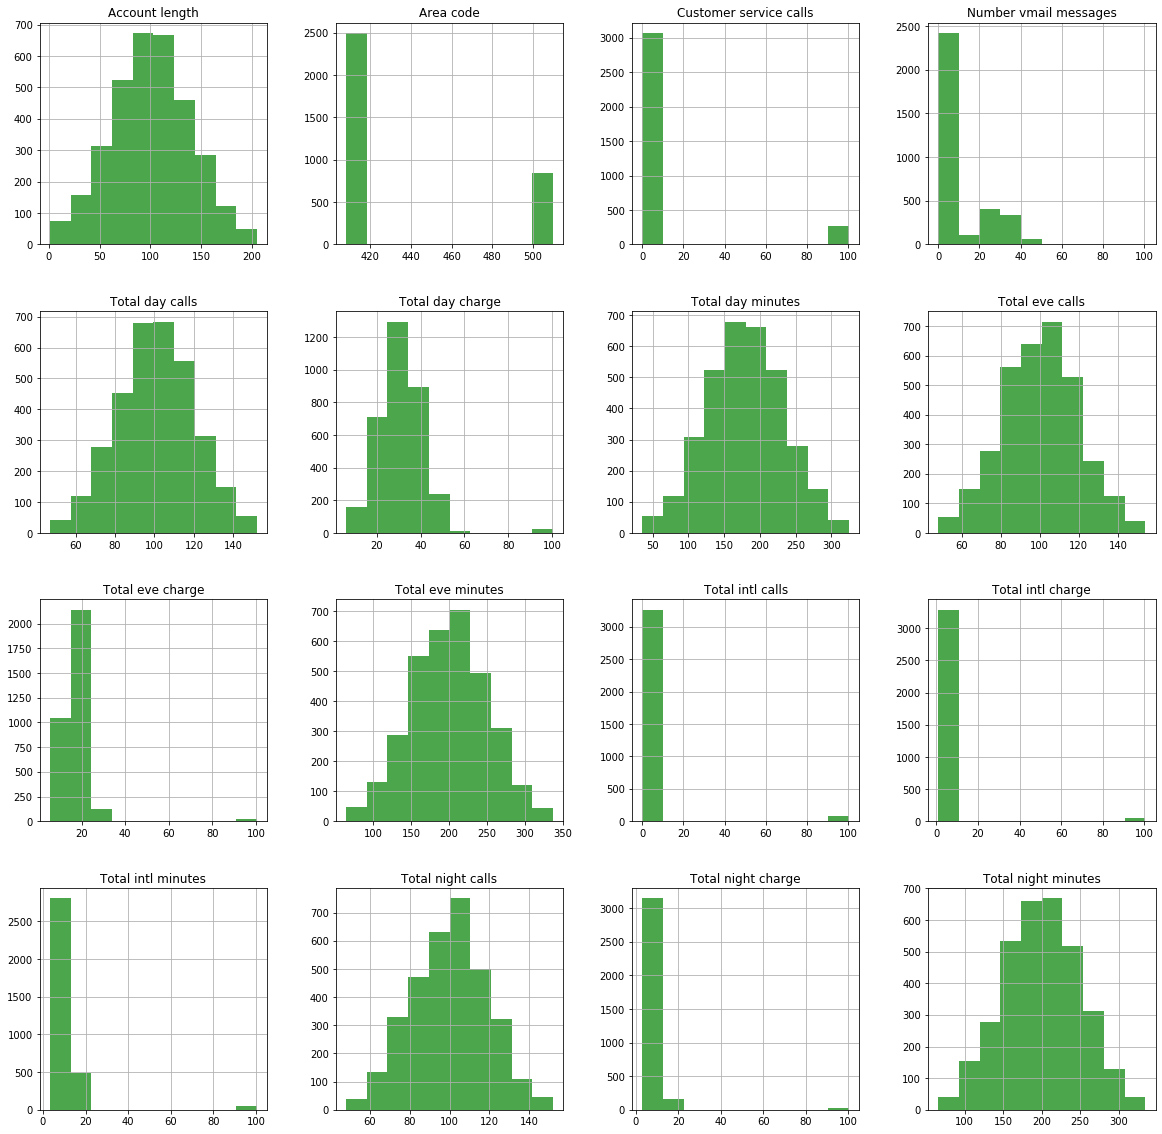

In [29]:
#Checking distribution of data via pandas visualization
train[cname].hist(figsize=(20,20),color='g',alpha = 0.7)
#plt.savefig('distribution.png')
plt.show()

In [30]:
# #Histogram breaks down by target variable
def plot_hist_y(x,y):
    plt.hist(list(x[y == 1]),color='green',label='True',bins='auto')
    plt.hist(list(x[y == 0]),color='grey', alpha = 0.7, label='False',bins='auto')
    plt.title("Histogram of {var} breakdown by {Y}".format(var = x.name,Y=y.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.savefig("Histogram of {var} breakdown by {Y}.png".format(var = x.name,Y=y.name))
    plt.show()

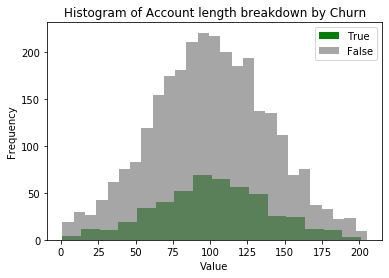

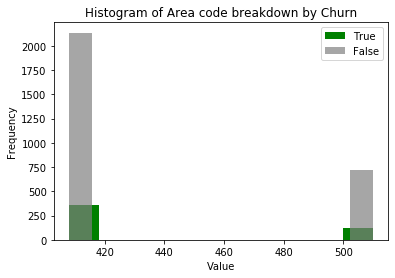

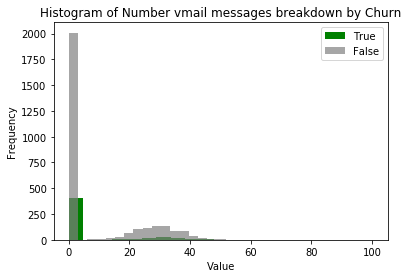

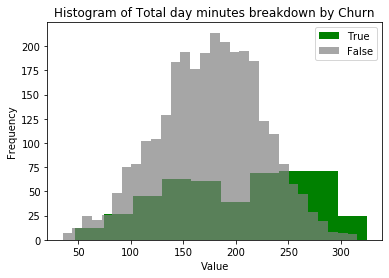

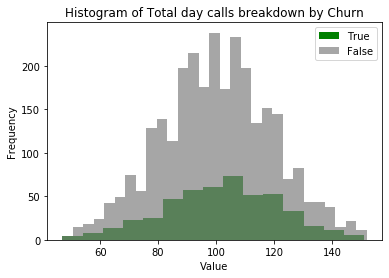

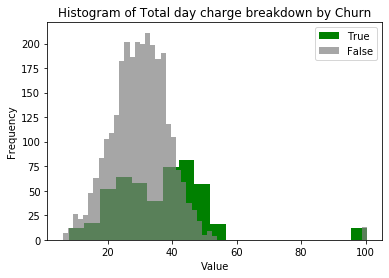

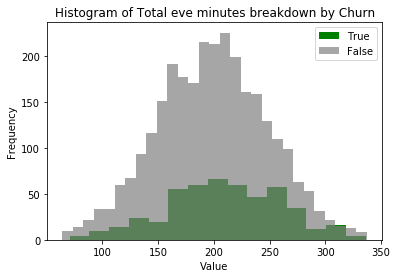

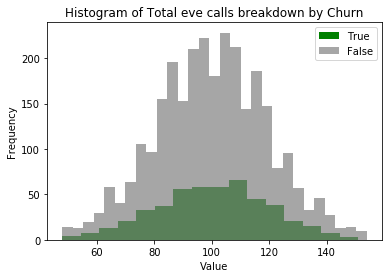

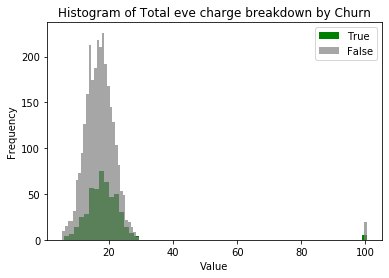

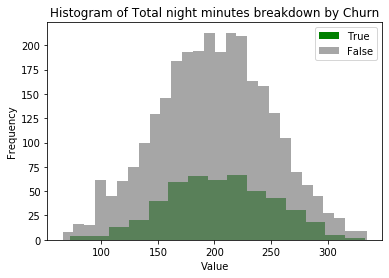

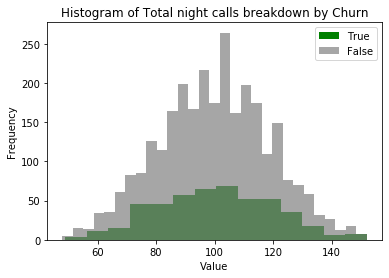

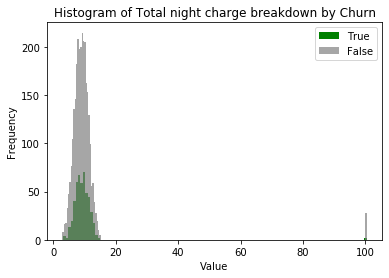

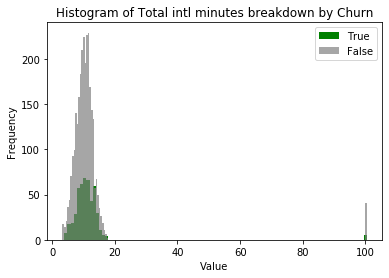

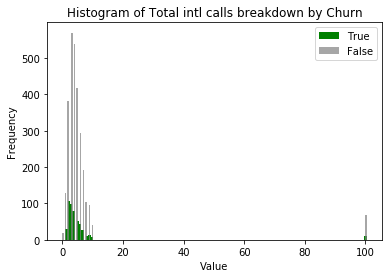

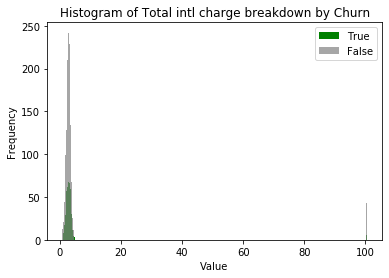

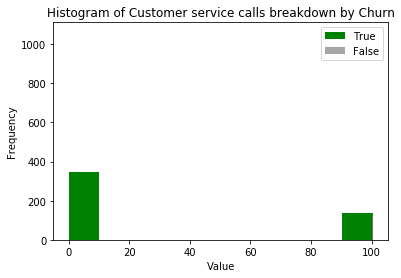

In [31]:
for i in cname:
    #print(i)
    plot_hist_y(train[i],train.Churn)

###### As most of the data is uniformally distributed , Hence Using data Standardization/Z-Score here